In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df=pd.read_csv("housing.csv")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [52]:
df.dropna(inplace=True)

In [53]:
from sklearn.model_selection import train_test_split
x=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

In [54]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [55]:
train_data=x_train.join(y_train)

[[<Axes: title={'center': 'longitude'}>
  <Axes: title={'center': 'latitude'}>
  <Axes: title={'center': 'housing_median_age'}>]
 [<Axes: title={'center': 'total_rooms'}>
  <Axes: title={'center': 'total_bedrooms'}>
  <Axes: title={'center': 'population'}>]
 [<Axes: title={'center': 'households'}>
  <Axes: title={'center': 'median_income'}>
  <Axes: title={'center': 'median_house_value'}>]]


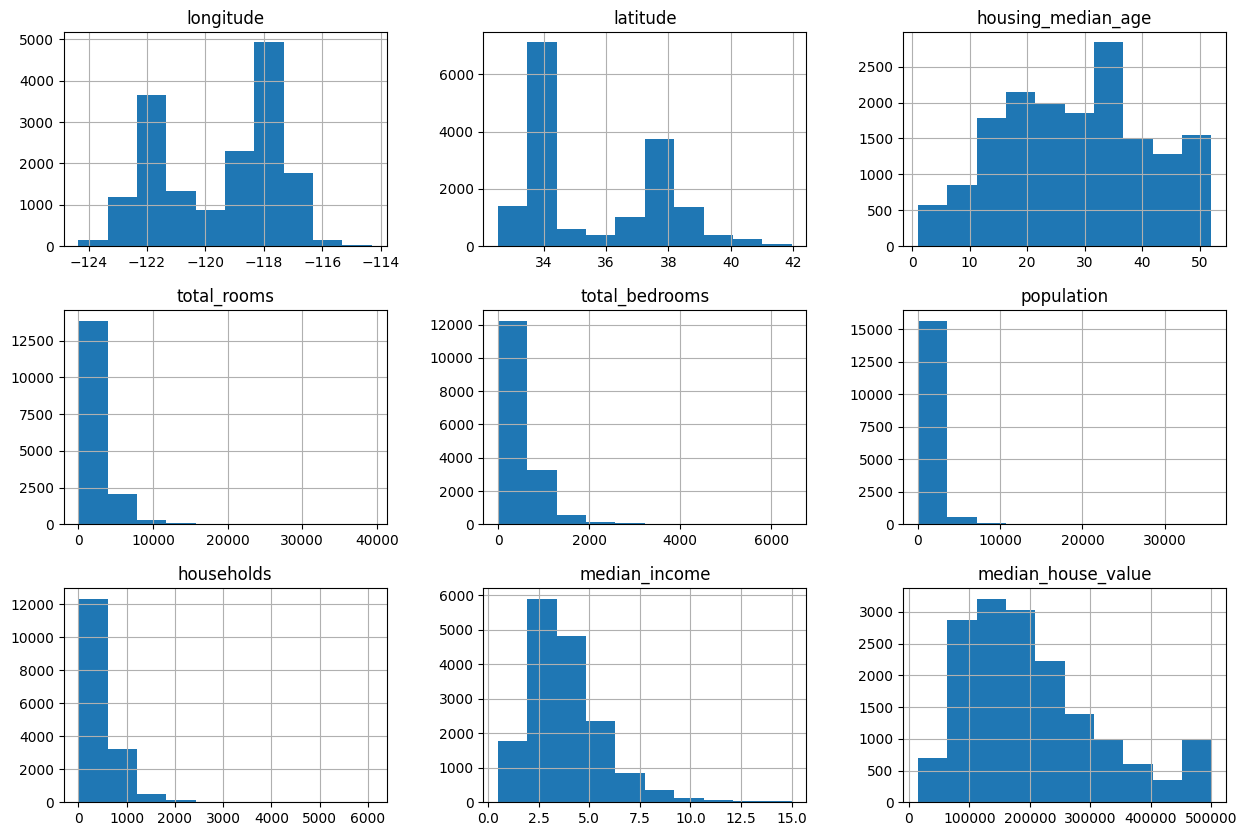

In [56]:
print(train_data.hist(figsize=(15,10)))

<Axes: >

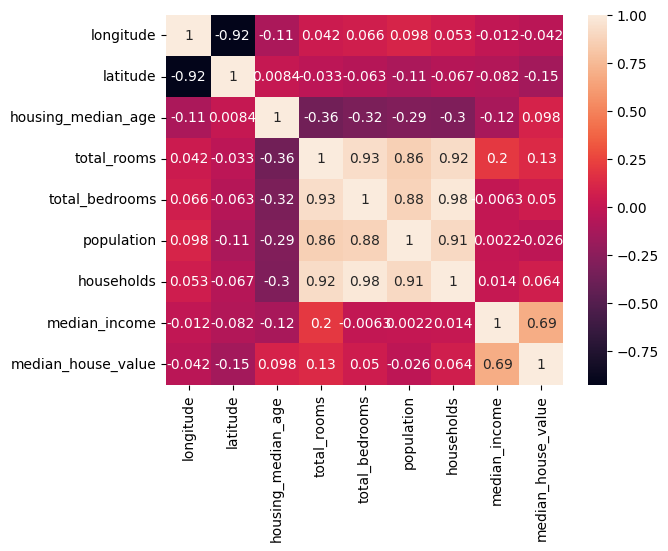

In [57]:
sns.heatmap(train_data.corr(numeric_only=True),annot=True)

In [22]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['households']=np.log(train_data['households']+1)
train_data['population']=np.log(train_data['population']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

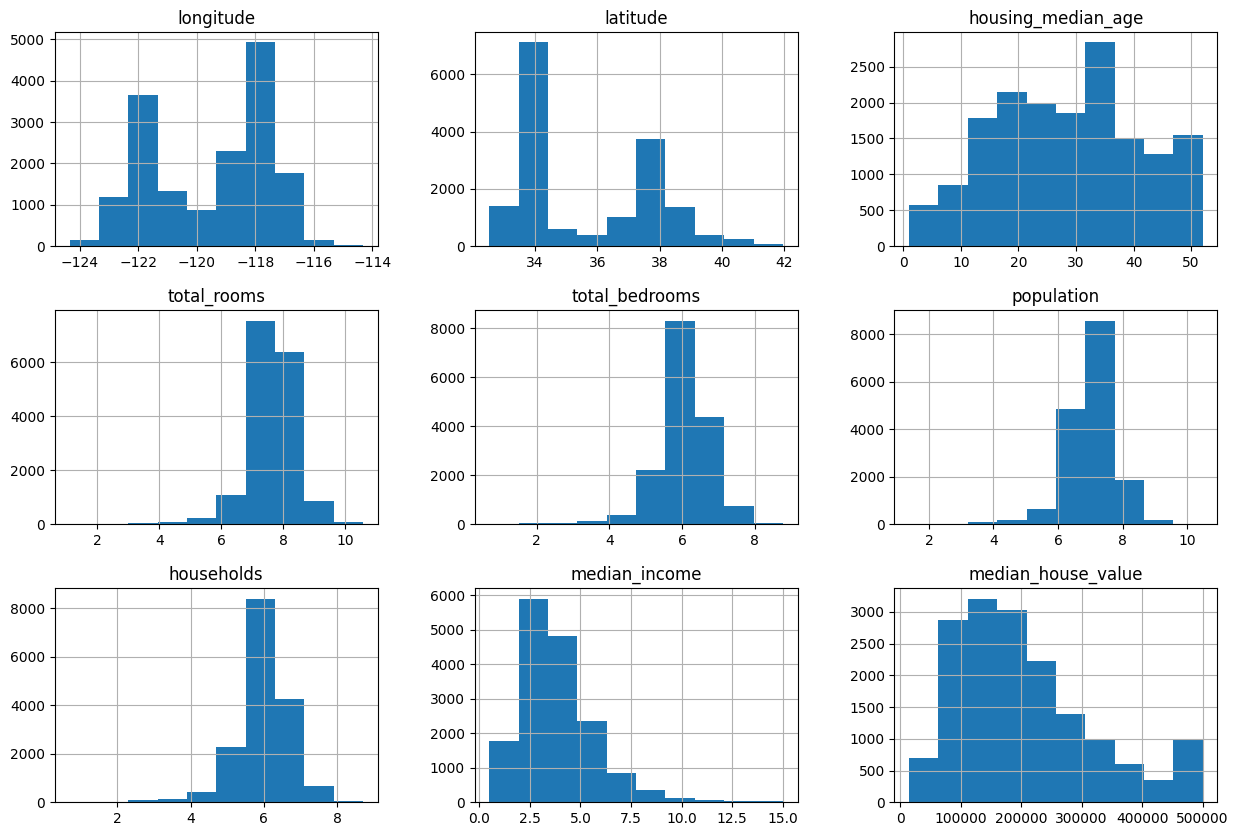

In [59]:
train_data.hist(figsize=(15,10))

In [60]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [61]:
train_data=train_data.astype(int)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2056,-119,36,20,7,6,7,6,3,92300,0,1,0,0,0
3601,-118,34,32,8,6,7,6,5,242300,1,0,0,0,0
12858,-121,38,38,6,5,6,5,2,73400,0,1,0,0,0
18212,-122,37,20,8,6,7,6,4,500001,0,0,0,1,0
19166,-122,38,28,7,6,7,6,1,114100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7867,-118,33,25,7,6,6,6,2,243800,1,0,0,0,0
16186,-121,37,52,4,4,5,3,0,22500,0,1,0,0,0
16591,-121,37,7,9,7,8,6,5,208100,0,1,0,0,0
20303,-119,34,12,6,4,6,4,5,167400,0,0,0,0,1


<Axes: >

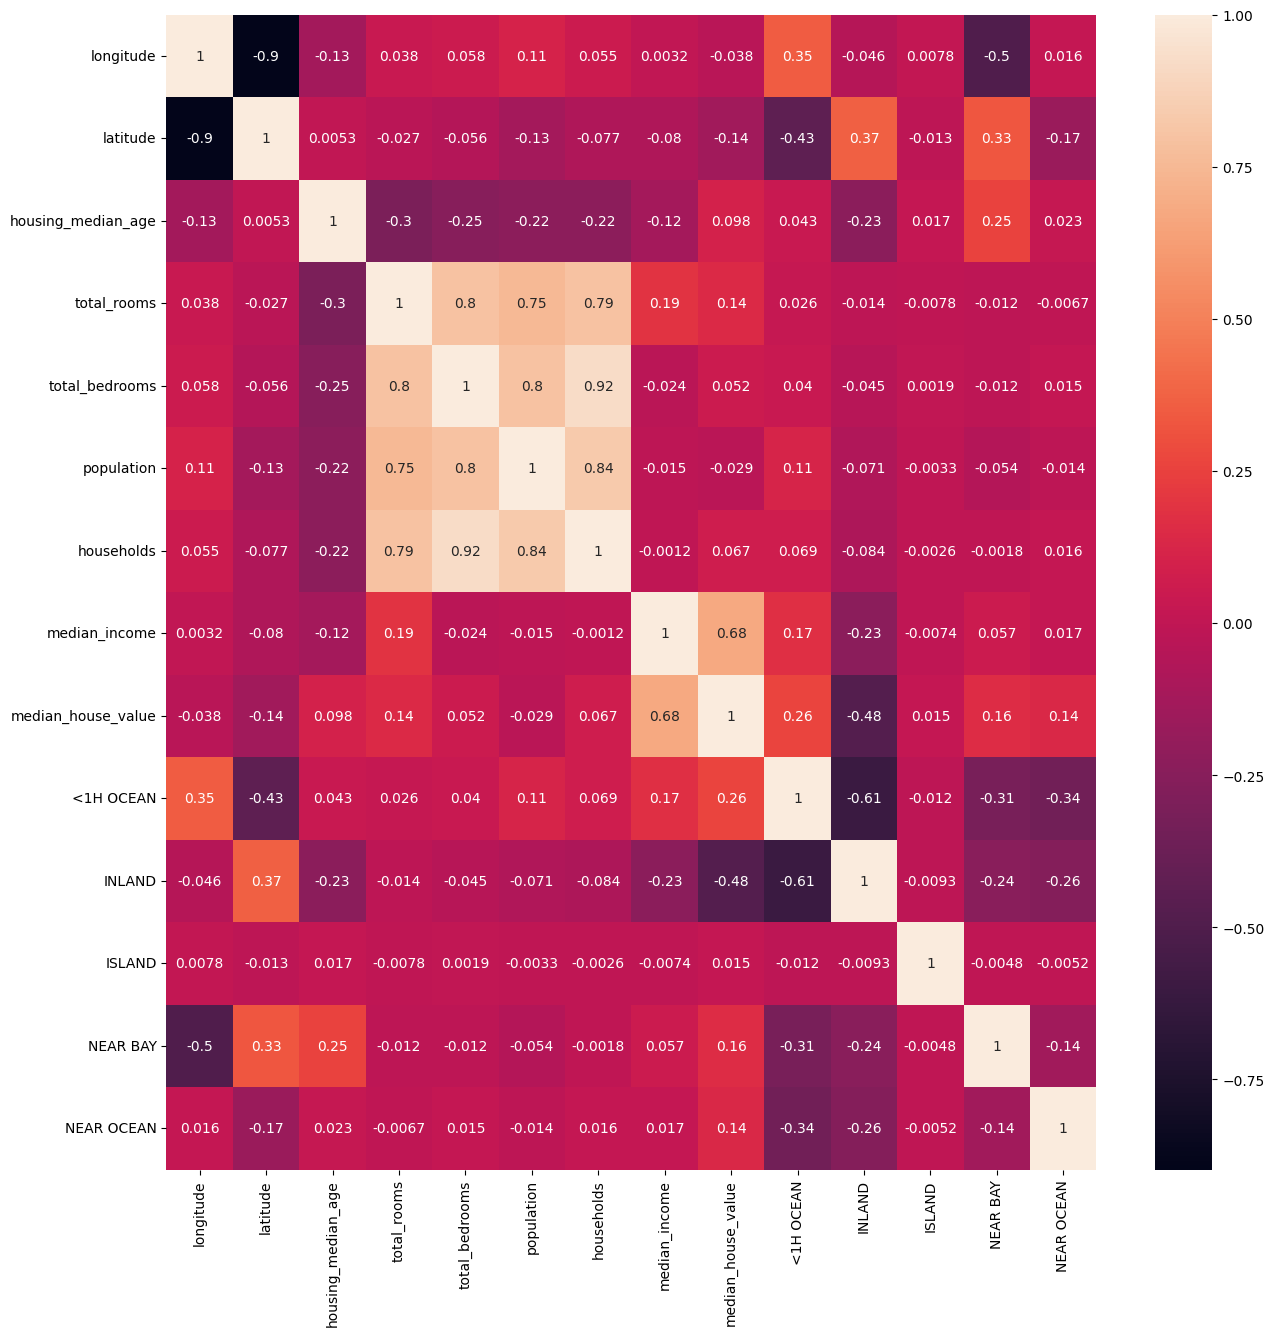

In [62]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(),annot=True)

<Axes: xlabel='longitude', ylabel='latitude'>

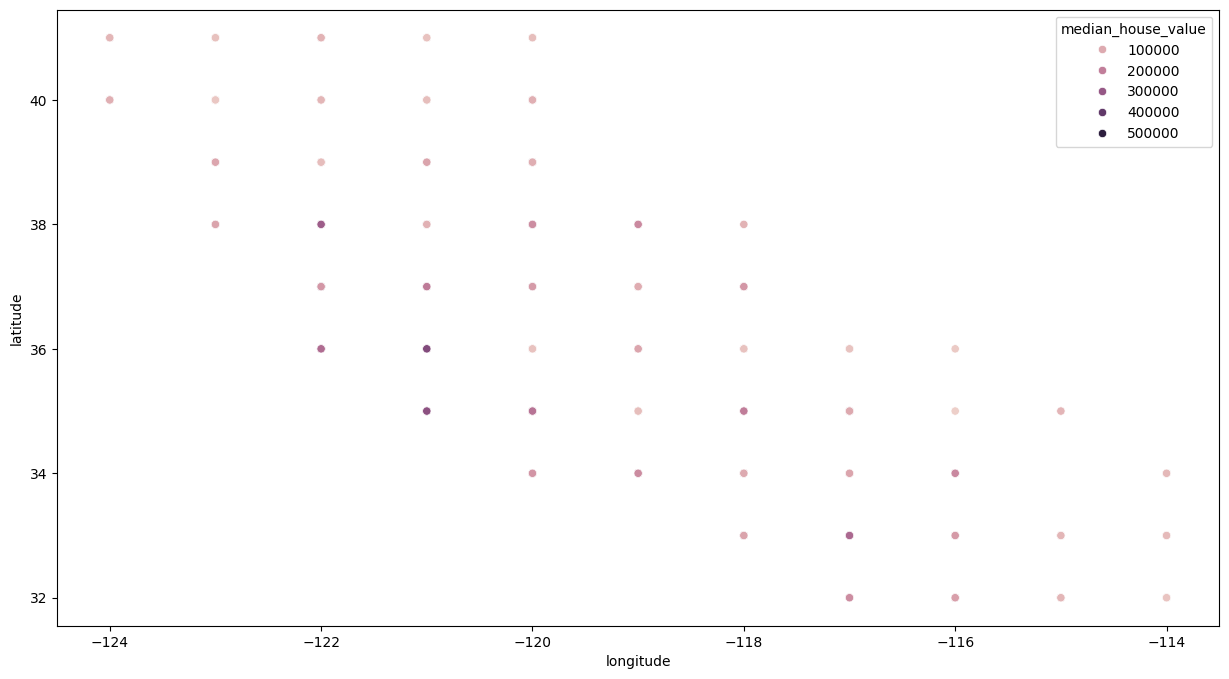

In [63]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='longitude', y='latitude', data=train_data, hue='median_house_value')


In [64]:
from sklearn.linear_model import LinearRegression
x_train=train_data.drop(['median_house_value'],axis=1)
y_train=train_data['median_house_value']

reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [65]:
test_data=x_test.join(y_test)
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['households']=np.log(test_data['households']+1)
test_data['population']=np.log(test_data['population']+1)
test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data=test_data.astype(int)


In [66]:
x_test=test_data.drop(['median_house_value'],axis=1)
y_test=test_data['median_house_value']

# Since the reg score is very poor it means linear regression is not the best suitable model for this data set 

In [67]:
reg.score(x_test,y_test)

0.6116132309226681

In [68]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [69]:
forest.score(x_test,y_test)

0.6701259566514677

In [73]:
# Generate predictions on the test data
y_pred = forest.predict(x_test)

# Now y_pred contains the predicted values for the test data
print(y_pred)

[231641.85       258894.6031746  170691.17857143 ... 148777.56666667
 313334.80555556 202837.97777778]


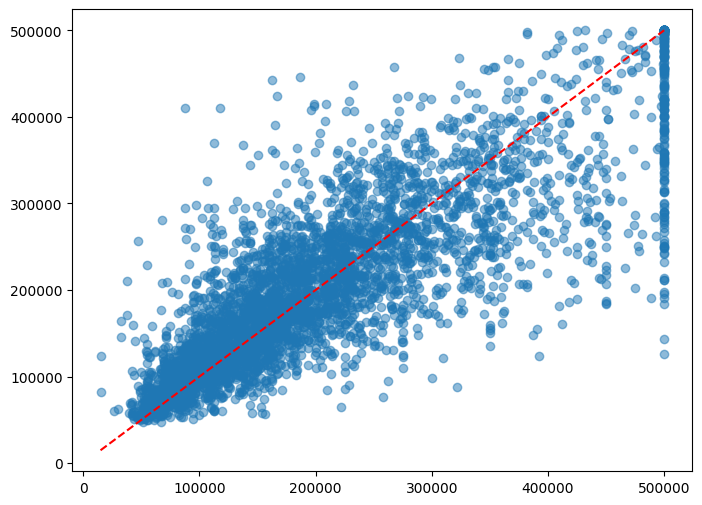

In [74]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 